# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL

# THÔNG TIN NHÓM

1. MSSV-21521809
  - Họ và Tên: Nguyễn Quốc An
  - Số buổi vắng: 1
  - Số bài tập quá trình: 9
  - Điểm WeCode: 2675

2. MSSV-21522608
  - Họ và Tên: Lê Phương Thảo
  - Số buổi vắng: 1
  - Số bài tập quá trình: 9
  - Điểm WeCode: 1735


# THÔNG TIN ĐỒ ÁN - THỰC HÀNH

Các SV cần mô tả đầy đủ, càng chi tiết càng tốt về các bài thực hành đã làm để có cơ sở tính điểm đồ án và thực hành.

### 1. Trang github của nhóm:
- https://github.com/Qan2003/CS114.O21-21521809-21522608.git

### 2. Danh sách các bài thực hành đã làm - điền thời điểm (ngày, giờ) nộp bài trên Classroom:
+ Thống kê dữ liệu (CS114.Tool.DatasetStat.ipynb):  6 June
+ Tạo các splits (CS114.Tool.CreateSplit.ipynb):  8 June
+ Hiển thị các ảnh (CS114.Tool.DatasetViz.ipynb):  8 June
+ Ứng dụng Clustering (CS114.Clustering.ipynb):  10 June
+ Huấn luyện Model (CS114.Train.ipynb): 13 June
+ Đánh giá Model (CS114.Evaluation.ipynb):  13 June

### 3. Đồ án cuối kỳ: MotocycleClassification


- Thông tin tổng quát:
  - Tổng số lượng ảnh đóng góp: 299.
  - Phương pháp thu thập:
    * Tìm kiểm trên mạng
    * Khi lựa chọn các hình ảnh nên có các yêu cầu cụ thể (trình bày ở phần chi tiết).

  - Phương pháp rút trích đặc trưng sử dụng: ResNet50
  - Thuật toán học được sử dụng: FCNN
  - Framework, thư viện sử dụng: Keras, PyTorch, Tensorflow, Scikit-learn
  - Kết quả Accuracy:
  - Xếp hạng:
- Thông tin chi tiết thực hiện:
  - Qúa trình lấy ảnh:
    - Các yêu cầu khi lựa chọn các hình ảnh: mỗi loại xe nên nhiều góc nhìn khác nhau như: đầu xe, đuôi xe, thân xe, hình ảnh thân xe tổng quát, hình nền trắng hoặc hình nền nhiều bối cảnh để giúp mô hình có thể học được nhiều đặt trưng hơn, từ đó giúp đảm bảo trong trường hợp thực tế mô hình vẫn có thể dự đoán được được hãng xe. Đặc biệt, nên cân bằng số lượng xe có logo và không có logo. Có logo sẽ giúp mô hình học được đặc trưng này, nhưng để đảm bảo mô hình không bị quá phụ thuộc vào đặc trưng này nên chọn cân bằng số lượng xe không có logo.
  -  Trích xuất đặc trưng:
    - Sử dụng mô hình ResNet50 (Loại bỏ lớp phân loại của mô hình này, và thay bằng loại chọn của nhóm)
  - Xử lý đặc trưng:
    - Sau khi trích xuất đặc trưng ta được các tập dữ liệu (csv) với số lượng cột là 2048. Tuy nhiên, số lượng mẫu trên mỗi class không cân bằng (ví dụ: số lượng mẫu trên label 1 nhiều hơn một nữa label 4). Do đó, để cân bằng số lượng dữ liệu ở mỗi class, chúng ta có thể sử dụng một số kỹ thuật xử lý như: SMOTE và imbalance để over-sample hoặc để class không tăng, giảm quá nhiều thì có thể sử dụng một thông số threshold để chia ngưỡng, lấy một ngưỡng nào đó để tăng, giảm dữ liệu cân bằng.
    - Ở đây, nhóm đã thử nghiệm sử dụng cả 2 kỹ thuật SMOTE và lấy ngưỡng threshold trên split 1. Và nhận thấy cả 2 kỹ thuật đều cho ra kết quả tương đương nhau. Nên nhóm quyết định sử dụng SMOTE cho cả 5 split.
  - Cấu hình mô hình:
    - Lớp phân loại/ output layer của ResNet50 là 1 lớp Dense với thuật toán activate là softmax. Vì số lượng đặc trưng rút ra là 2048 đặc trưng, là một số lượng tương đối nhiều. Do đó, để tăng cường thêm khả năng phân loại từ các đặc trưng rút ra từ các layer Convolution của ResNet, nhóm đã thêm 7 lớp Dense, với số neuron bắt đầu từ 2048. Lý do sử dụng số lượng nhiều neuron bắt đầu là vì khi thực hiện nhóm chỉ thực hiện với 1024 và 512 neuron và nhận thấy hiện tượng overfit, khi mà càng về sau loss của val càng cao hơn loss của train, và không có hiện tượng hội tụ lại của 2 hàm này.
    - Bên trong mô hình, ngoài việc sử dụng các lớp để học và phân loại. Sử dụng thêm một lớp Dropout để tránh overfit. Cụ thể, khi sử dụng lớp Dropout này, ở mỗi layer học, mô hình sẽ tạm ngưng hoạt động của 1 số neuron theo tỉ lệ đã đặt, lý do của việc này là vì sẽ giúp mô hình không phụ thuộc vào bất kỳ đặc trưng nào, giống như việc không để mô hình phụ thuộc vào đặc trưng logo xe mà nhận diện ra hãng xe.
  - Chia tập dữ liệu:
    - Lý do của việc thực hiện huấn luyện mô hình trên từng split riêng biệt thay vì huấn luyện mô hình liên tục trên các split. Vì ở mỗi split train, sẽ có 1 phần data test. Do đó, nếu thực hiện train model liên tục trên các split train sẽ dẫn đến việc model học luôn cả dữ liệu của test.
    - Ví dụ: split train 1 có chứa dữ liệu test 5, khi thực hiện train trên split train 5 (không có data test 5) và đánh giá mô hình trên test 5. Mô hình trước đó đã học dữ liệu test 5 ở split 1, do đó có thể dẫn đến accuracy cao khi đánh giá ở split 5. Do đó, nhóm thực hiện train và đánh giá mô hình trên từng split riêng biệt.
  - Training:
    - Xử lý tránh overfiting:
      - Sử dụng kỹ thuật early stopping để tránh tình trạng overfit có thể xảy ra. Đây là kỹ thuật được sử dụng nhiều để tránh hiện tượng overfit, nó sẽ dùng khi nhận thấy loss của tập val không còn cải thiện (giảm) được nửa. Từ kỹ thuật này, sẽ giúp mô hình ngưng cập nhật tham số mô hình, giúp mô hình giữ được tham số học tổng quát nhất.
    - Sử dụng hàm kích hoạt (activate) là softmax để chuyển số kết quả đầu ra của mỗi class là xác suất dự đoán cho mỗi class đó.
    - Sử dụng một số thông số cập nhật tham số tối ưu như: Adam với learning_rate là 0.01, hàm loss sử dụng categorical_crossentropy cho bài toán phân loại, ... (Các tham số này được điều chỉnh sau quá trình train nhiều lần và đánh giá hiệu suất).
  - Đánh giá hiệu suất:
    - Đánh giá từng mô hình trên từng split test riêng biệt như đã nói.
    - Sử dụng biểu đồ Learning Curves trên tập train, val: để xem cách loss và accuracy của mô hình thay đổi qua các epoch. Từ đó có thể đánh giá liệu mô hình có đang học tốt hay không. Khi mô hình biểu diễn tốt trên tập huấn luyện nhưng kém trên tập validation, đường loss của train giảm trong khi đường loss của val không giảm hoặc tăng lên, đây là hiện tương overfit. Và Underfitting khi mô hình không biểu diễn tốt trên cả tập huấn luyện và tập validation, cả hai đường loss đều cao và không có dấu hiệu giảm đáng kể.
    - Sử dụng confusion matrix trên tập test: từ ma trận này, có thể đánh giá được số lượng chính xác và không chính xác mỗi class.

### 4. Bài tập - Dự đoán điểm IT001

-  Quá trình xử lý dữ liệu
  - Đặc trưng rút trích:
    + Số lượng bài tập duy nhất mỗi người dùng đã làm (num_unique_assignments): Sử dụng nunique() để đếm số lượng bài tập duy nhất mà mỗi người dùng đã thực hiện.
    + Số bài toán duy nhất trong mỗi bài tập (num_unique_problems): Nhóm dữ liệu theo username và assignment_id và tính số lượng duy nhất của problem_id.
    + Tổng và trung bình số bài toán cho mỗi username: Tính tổng và trung bình số bài toán mà mỗi người dùng đã làm.
    + Số lần nộp bài cuối cùng cho mỗi người dùng (sum_is_final): Sử dụng sum() để đếm số lần nộp bài được đánh dấu là cuối cùng.
    + Số lượng và trung bình lần nộp bài không phải cuối cùng theo bài tập và bài toán (num_final_0_problem, average_final_0_problem): Tính số lần và trung bình số lần nộp bài không phải là cuối cùng.
    + Số lượng và trung bình của SCORE và Compilation Error theo người dùng, bài tập và bài toán: Đếm số lượng và tính trung bình cho các trạng thái này.
    + Phân tích pre_score: Tính số lần và trung bình điểm trước là 0 và không phải 0, cũng như tổng và trung bình tổng điểm trước không phải 0.
    + Số ngôn ngữ lập trình khác nhau mỗi người dùng đã sử dụng.
    + Số ngày và giờ khác nhau mà người dùng làm bài: Tách cột created_at và phân tích theo ngày và giờ.
    + Số lần coefficient khác 100.
    + Phân tích các thống kê liên quan đến times, mems, verdicts: Tính tổng, trung bình và số lượng khi các giá trị này bằng 0 hoặc khác 0.
  
  - Phương pháp:
    + Nhóm dữ liệu: Sử dụng groupby() để nhóm dữ liệu theo các biến khác nhau như username, assignment_id, problem_id.
    + Tính toán thống kê: Sử dụng các hàm như sum(), mean(), count(), và nunique() để tính toán các thống kê cần thiết.
    + Lọc dữ liệu: Sử dụng điều kiện lọc để tính toán thống kê cho các bộ phận dữ liệu cụ thể.

    Quản lý và Lưu trữ Kết quả:
    + DataFrame Kết quả: Tất cả các kết quả đặc trưng được lưu trữ trong một DataFrame result.
    + Xuất dữ liệu: Sử dụng to_csv() để lưu kết quả vào một file CSV có tên là data.csv.

- Quá trình huấn luyện và đánh giá
 - Xử lý Dữ Liệu:
    + Dữ liệu được tải từ tệp CSV 'train.csv'. Sau đó, các giá trị thiếu trong tập dữ liệu được thay thế bằng 0.
    + Mục tiêu dự đoán (cột 'Target') được tách ra thành biến target.
    + Cột 'username' và cột 'Target' bị loại bỏ khỏi các đặc trưng để huấn luyện.
      
    Phân Chia Dữ Liệu:
    + Dữ liệu được chia thành tập huấn luyện và tập kiểm thử với tỉ lệ 80% dữ liệu cho huấn luyện và 20% cho kiểm thử.
  
  - Khảo Sát Dữ Liệu:
    + Biểu đồ histogram được vẽ để thể hiện phân phối của biến mục tiêu trong tập kiểm thử.

  - Huấn Luyện Mô Hình:
    + Mô hình RandomForestRegressor và ExtraTreesRegressor được huấn luyện trên tập dữ liệu huấn luyện.
    + Dự đoán trên tập kiểm thử và tính điểm số r2_score để đánh giá hiệu quả của mô hình.

 - Xử Lý Dữ Liệu Kiểm Thử:
    + Dữ liệu kiểm thử từ tệp 'test.csv' được tải và xử lý tương tự như tập huấn luyện (thay thế giá trị thiếu và loại bỏ cột 'username').

 - Dự Đoán và Xuất Kết Quả:
    + Cả hai mô hình được sử dụng để dự đoán trên tập dữ liệu kiểm thử.
    + Các dự đoán được ghi vào tệp CSV để tạo file nộp bài.

### 5. Bài tập - Nhận dạng chữ số viết tay:

Dữ liệu được thu thập bằng cách tự viết tay các số từ 1 đến 9 mỗi số có 3 ảnh khác nhau và được lưu vào các folder số tương ứng.  
- Đặc trưng của dữ liệu
  - Định dạng dữ liệu ảnh: Các ảnh chữ số viết tay từ 0 đến 9, có kích thước 28x28 pixels. Các ảnh này ban đầu là đơn sắc và được định dạng lại để có một kênh màu (greyscale).  

  - Chuẩn hóa dữ liệu: Dữ liệu ảnh được chuẩn hóa bằng cách chuyển đổi giá trị pixel từ kiểu số nguyên sang số thực và chia cho 255 để đưa giá trị về phạm vi từ 0 đến 1. Việc này giúp cải thiện hiệu quả huấn luyện của mạng nơ-ron bằng cách làm giảm sự chênh lệch độ lớn giữa các đặc trưng đầu vào.  

 - One-hot encoding: Nhãn của mỗi ảnh được biến đổi thành dạng one-hot vector, tức là một vector mà tất cả các thành phần đều bằng 0 trừ thành phần thể hiện nhãn đúng của ảnh, được đặt là 1. Điều này phù hợp cho bài toán phân loại nhiều lớp.  

- Thuật toán và mô hình học
Mô hình học sâu: Sử dụng một mạng nơ-ron tích chập đơn giản (CNN) với cấu trúc bao gồm:

 + Lớp tích chập (Conv2D): Sử dụng 32 bộ lọc với kích thước 3x3, hàm kích hoạt ReLU, và khởi tạo trọng số He uniform, phù hợp cho mạng ReLU để giảm vấn đề biến mất gradient.  
 + Lớp gộp tối đa (MaxPooling2D): Giảm chiều dữ liệu đầu ra từ lớp tích chập, giúp mô hình bớt nhạy cảm với vị trí của đặc trưng trong ảnh.  
 + Lớp làm phẳng (Flatten) và các lớp kết nối đầy đủ (Dense): Chuyển đổi đầu ra từ dạng ma trận sang vector và áp dụng học có giám sát để phân loại ảnh.
   
- Biên dịch mô hình: Sử dụng thuật toán tối ưu hóa Stochastic Gradient Descent (SGD) với hệ số học là 0.01 và động lượng 0.9, cùng với hàm mất mát là categorical_crossentropy, phù hợp cho bài toán phân loại nhiều lớp.  

- Đánh giá mô hình: Sử dụng kỹ thuật kiểm định chéo k-fold để đánh giá độ chính xác của mô hình, đảm bảo mô hình hoạt động tốt trên nhiều tập dữ liệu kiểm thử khác nhau và không bị quá khớp.  

- Xử lý ảnh đầu vào:
 - Để sử dụng trong mô hình đã huấn luyện, ảnh đầu vào cần được xử lý qua các bước làm mờ Gaussian, ngưỡng thích ứng, tìm và cắt khu vực chứa chữ số, thêm đệm, và cuối cùng là thay đổi kích thước về 28x28 pixels.  

### MÔ TẢ HỖ TRỢ CỦA CÁC CÔNG CỤ NHƯ CHATGPT, GEMINI, POE

- Sử dụng công cụ ChatGPT để hỗ trợ các đoạn code không nhớ hoặc code không biết. Mọi ý tưởng được dựa trên kiến thức họ được. Và hỏi ChatGPT các kiến thức không chắc chắn và các kiến thức chưa được học/ tiếp thu.

# CODE

In [30]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime
from collections import Counter
from keras.models import load_model
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LambdaCallback

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Bước Feature Extraction

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/Colab/data-split/MotocycleDataset-Splits-2-Train.csv', names=['image_dir', 'category_id'])
image_paths = df['image_dir'].tolist()

# Thêm tiền tố vào danh sách đường dẫn hình ảnh
base_path = '/content/drive/MyDrive/Public/'
image_paths = [os.path.join(base_path, img_path) for img_path in image_paths]

labels = df['category_id'].values

Gía trị cột labels đang ở dạng numeric (số tự nhiên). Tuy nhiên, ResNet là mô hình mạng nơ-ron (các node liên kết với nhau trong từng layer). Do đó, đầu vào thường yêu cầu của các mô hình nơ-ron network là dạng one-hot encoding, hoặc đúng hơn là yêu cầu một vector 1 chiều. Do đó, khi thực hiện encoding, numeric sẽ được hiển thị dưới dạng là một vector 1 chiều và chỉ chứa 2 phần từ 0 và 1.  

In [ ]:
#Encoding cho cột labels
num_classes = len(np.unique(labels))
enc_labels = tf.keras.utils.to_categorical(labels, num_classes)

In [ ]:
# Hàm chuẩn hóa dữ liệu trước khi đưa vào mô hình
def preprocess_image(image_path):
    try:
        img = image.load_img(image_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        return img
    except (OSError, IOError) as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [ ]:
# Tạo generator để load ảnh theo batch
def generator(image_paths, labels, batch_size=32):
    num_samples = len(image_paths)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_paths = image_paths[offset:offset + batch_size]
            batch_labels = labels[offset:offset + batch_size]
            batch_images = []
            valid_labels = []
            for i, path in enumerate(batch_paths):
                img = preprocess_image(path)
                if img is not None:
                    batch_images.append(img)
                    valid_labels.append(batch_labels[i])
            if len(batch_images) > 0:
                yield np.vstack(batch_images), np.array(valid_labels)

In [ ]:
# Hàm lưu trữ đặc trưng và nhãn
def save_features_labels(features, labels, feature_file, label_file):
    if os.path.exists(feature_file) and os.path.exists(label_file):
        existing_features = np.load(feature_file)
        existing_labels = np.load(label_file)
        features = np.vstack([existing_features, features])
        labels = np.vstack([existing_labels, labels])
    np.save(feature_file, features)
    np.save(label_file, labels)

In [ ]:
# Hàm để lưu lại chỉ số batch đã xử lý
def save_processed_batch(batch_num, filename="processed_batch.txt"):
    with open(filename, "w") as f:
        f.write(str(batch_num))

# Hàm để đọc chỉ số batch đã xử lý
def load_processed_batch(filename="processed_batch.txt"):
    if os.path.exists(filename):
        with open(filename, "r") as f:
            return int(f.read())
    return 0

Xây dựng mô hình với phần trích xuất là ResNet50 và sử dụng lớp GlobalAveragePooling2D phần phân loại từ các đặc trưng vừa trích xuất từ ResNet50.

In [ ]:
# Trích xuất đặc trưng từ ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
model_resnet = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Tạo tệp lưu trữ các đặc trưng và nhãn sau khi được trích xuất từ mô hình
feature_file = '/content/drive/MyDrive/Colab/feature-label/features_2_2.npy'
label_file = '/content/drive/MyDrive/Colab/feature-label/labels_2_2.npy'

In [ ]:
# Kiểm tra số batch đã xử lý
if os.path.exists(feature_file) and os.path.exists(label_file):
    existing_features = np.load(feature_file)
    existing_labels = np.load(label_file)
    processed_samples = existing_features.shape[0]
else:
    processed_samples = 0

# Đọc chỉ số batch đã xử lý
processed_batch = load_processed_batch()

batch_size = 32
num_samples = len(image_paths)
# num_samples = min(1500, len(image_paths))
num_batches = (num_samples - processed_samples) // batch_size

gen = generator(image_paths, enc_labels, batch_size=batch_size)

# Bỏ qua các batch đã xử lý
for _ in range(processed_samples // batch_size):
    next(gen)

for batch_num in range(processed_batch, num_batches + 1):
    imgs, lbls = next(gen)
    features = model_resnet.predict(imgs)
    save_features_labels(features, lbls, feature_file, label_file)
    print(f"Processed batch {processed_samples // batch_size + batch_num + 1}/{(num_samples // batch_size) + 1}")

    # Lưu lại chỉ số batch đã xử lý
    save_processed_batch(batch_num + 1)

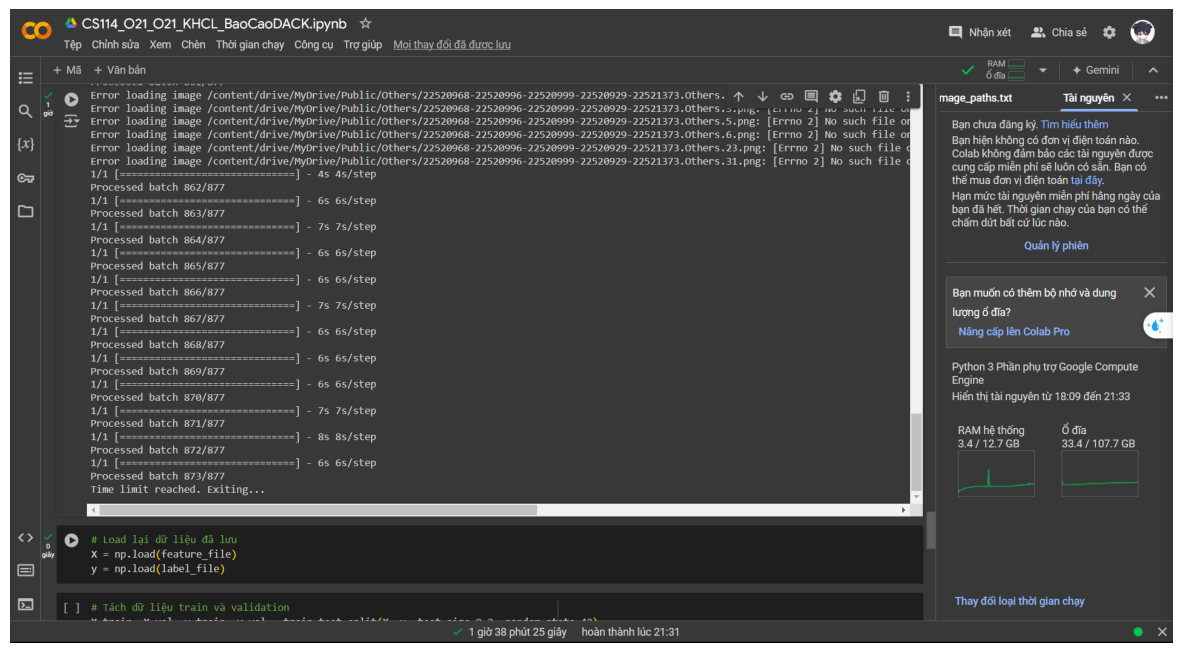

In [46]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Mở và hiển thị ảnh
img = Image.open("/content/drive/MyDrive/Colab/log/log_feature.png")
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')  # Ẩn các trục
plt.show()

*Vì lúc thực hiện trích xuất từ các split quá lâu nên em đã chia ra nhiều account để thực hiện. Và đã lỡ xóa phần output, nên dùng hình chụp màn hình một đoạn output để làm minh chứng là có thực hiện.*

### Bước thêm vào: Data (Feature) processing

In [ ]:
# Load các file feature và labels sau khi được trích xuất từ bước trên
feature_files = [
    '/content/drive/MyDrive/Colab/feature-label/features_1.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_2.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_3.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_4.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_5.npy'
]

label_files = [
    '/content/drive/MyDrive/Colab/feature-label/labels_1.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_2.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_3.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_4.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_5.npy'
]

In [13]:
# Load dữ liệu từ các file
X = [np.load(file) for file in feature_files]
y = [np.load(file) for file in label_files]

In [14]:
for i in range(5):
  print(f'File {i+1} : {Counter(np.argmax(y[i], axis=1))}')

File 1 : Counter({1: 7856, 3: 6636, 2: 5154, 0: 5144, 4: 3095})
File 2 : Counter({1: 7717, 3: 6642, 0: 5164, 2: 5142, 4: 3112})
File 3 : Counter({1: 7802, 3: 6553, 2: 5174, 0: 5172, 4: 3072})
File 4 : Counter({1: 7772, 3: 6647, 0: 5440, 2: 5113, 4: 3070})
File 5 : Counter({1: 7777, 3: 6626, 0: 5177, 2: 5141, 4: 3042})


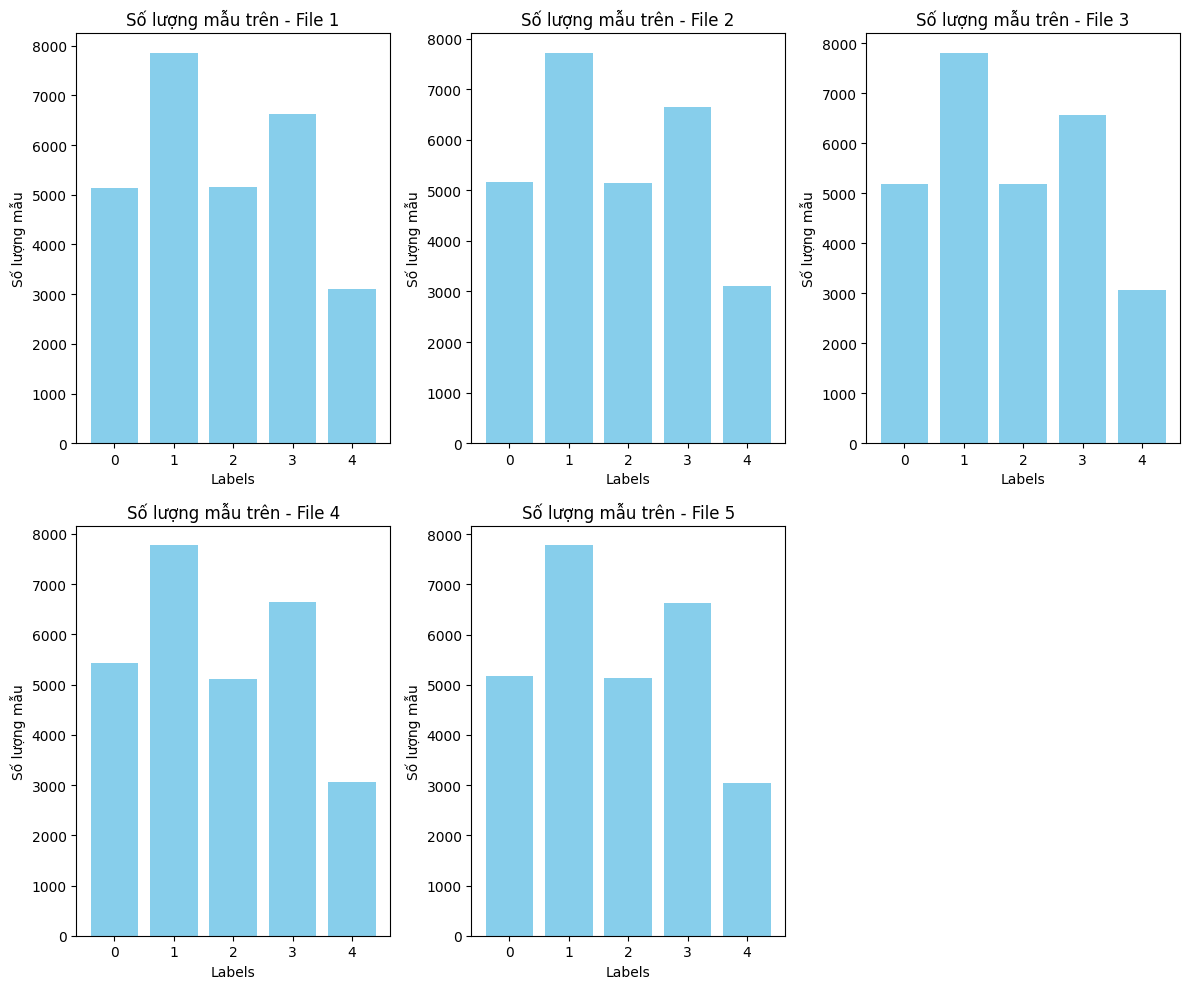

In [15]:
# Vẽ biểu đồ số lượng mẫu trên mỗi nhãn cho từng file
plt.figure(figsize=(12, 10))

for i in range(len(label_files)):
  # Chuyển đổi nhãn one-hot thành số nguyên
  y_int = np.argmax(y[i], axis=1)

  # Đếm số lượng mẫu trên mỗi nhãn
  label_counts = Counter(y_int)

  # Chuyển từ điển Counter sang list để sắp xếp nhãn
  labels, counts = zip(*label_counts.items())
  # Vẽ biểu đồ số lượng mẫu trên mỗi nhãn
  plt.subplot(2, 3, i + 1)
  plt.bar(labels, counts, align='center', color='skyblue')
  plt.xlabel('Labels')
  plt.ylabel('Số lượng mẫu')
  plt.title(f'Số lượng mẫu trên - File {i+1}')
  plt.xticks(labels)  # Đặt nhãn cho trục x

plt.tight_layout()
plt.show()

*Nhận xét: Ta thấy số lượng mẫu trên mỗi label là không đồng đều. Đặt biệt là ở label 1 và 4 có khoảng cách rõ rệt về số lượng, việc này có thể làm mô hình học quá đúng về class 1 nhưng ở class 4 thì xác suất chính xác thấp. Do đó, để cân bằng số lượng dữ liệu ở mỗi class, chúng ta có thể sử dụng một số kỹ thuật xử lý như: SMOTE và imbalance để over-sample hoặc để class không tăng, giảm quá nhiều thì có thể sử dụng một thông số threshold để chia ngưỡng, lấy một ngưỡng nào đó để tăng, giảm dữ liệu cân bằng*

### SMOTE - Cân bằng dữ liệu

Ở đây, nhóm đã thử nghiệm sử dụng cả 2 kỹ thuật SMOTE và lấy ngưỡng threshold trên split 1. Và nhận thấy cả 2 kỹ thuật đều cho ra kết quả tương đương nhau. Nên nhóm quyết định sử dụng SMOTE cho cả 5 split.

In [9]:
!pip install -U imbalanced-learn

In [16]:
# Sử dụng SMOTE để cân bằng số lượng mẫu trên các nhãn
X_resampled_list = []
y_resampled_list = []

for i in range(len(label_files)):
  # Áp dụng SMOTE
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X[i], (np.argmax(y[i], axis=1)))

  X_resampled_list.append(X_resampled)
  y_resampled_list.append(y_resampled)

  # Đếm lại số lượng mẫu sau khi cân bằng
  print("\nSố lượng mẫu sau khi cân bằng:")
  print(Counter(y_resampled))


Số lượng mẫu sau khi cân bằng:
Counter({1: 7856, 2: 7856, 4: 7856, 3: 7856, 0: 7856})

Số lượng mẫu sau khi cân bằng:
Counter({1: 7717, 2: 7717, 4: 7717, 3: 7717, 0: 7717})

Số lượng mẫu sau khi cân bằng:
Counter({1: 7802, 2: 7802, 4: 7802, 3: 7802, 0: 7802})

Số lượng mẫu sau khi cân bằng:
Counter({1: 7772, 2: 7772, 4: 7772, 3: 7772, 0: 7772})

Số lượng mẫu sau khi cân bằng:
Counter({1: 7777, 2: 7777, 4: 7777, 3: 7777, 0: 7777})


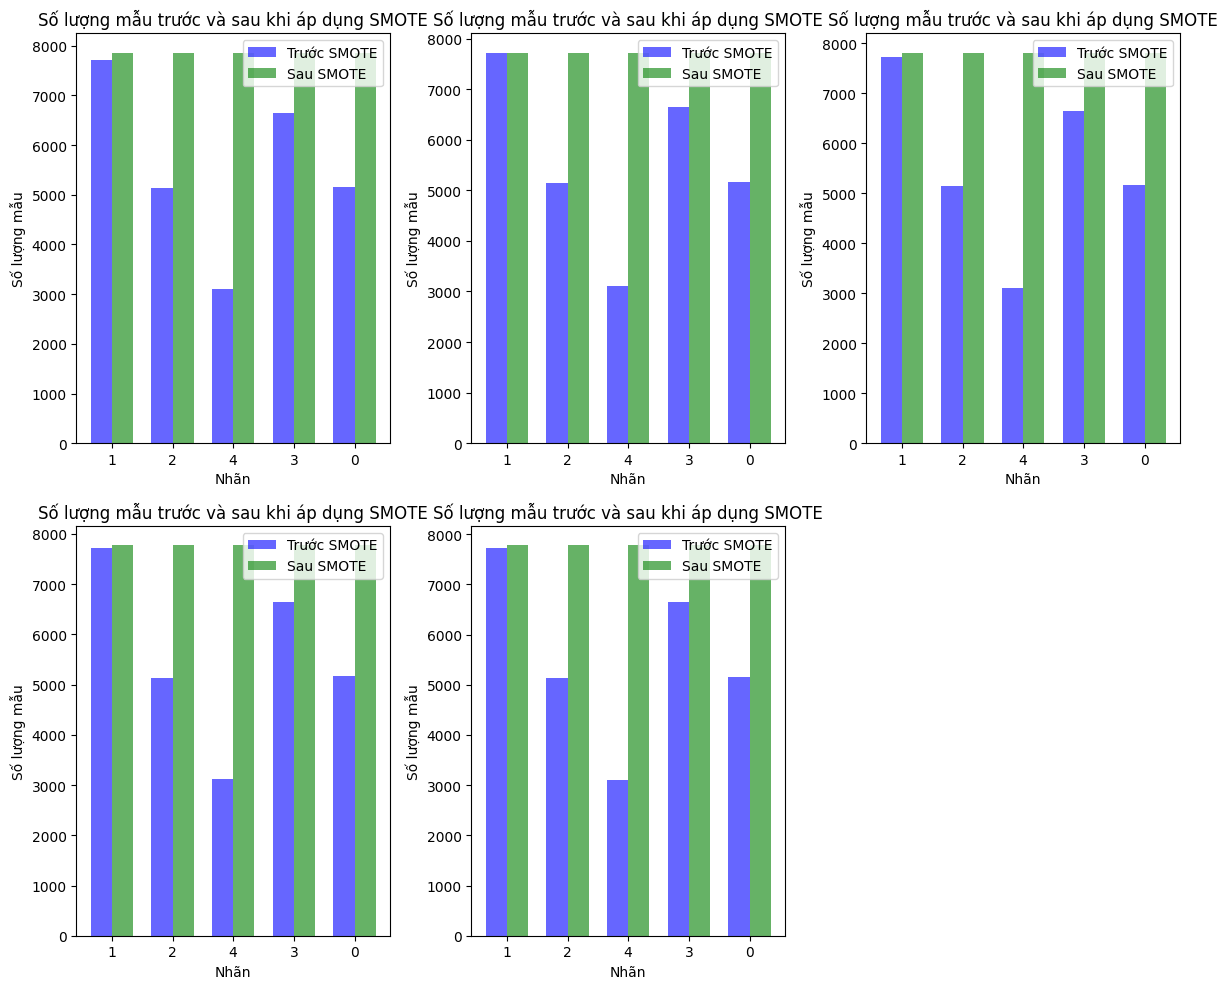

In [17]:
plt.figure(figsize=(12, 10))

for i in range(5):
    # Đếm số lượng mẫu trước khi cân bằng
    before_counts = Counter((np.argmax(y[1], axis=1)))
    # Đếm lại số lượng mẫu sau khi cân bằng
    after_counts = Counter(y_resampled_list[i])

    labels = list(before_counts.keys())
    before_values = list(before_counts.values())
    after_values = [after_counts[label] for label in labels]

    # Vẽ biểu đồ cột
    plt.subplot(2, 3, i + 1)
    bar_width = 0.35
    index = np.arange(len(labels))
    plt.bar(index, before_values, width=bar_width, label='Trước SMOTE', color='b', alpha=0.6)
    plt.bar(index + bar_width, after_values, width=bar_width, label='Sau SMOTE', color='g', alpha=0.6)
    plt.xlabel('Nhãn')
    plt.ylabel('Số lượng mẫu')
    plt.title('Số lượng mẫu trước và sau khi áp dụng SMOTE')
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()

plt.tight_layout()
plt.show()

### Bước: Model Configuration + Model Training

In [18]:
#Encoding cho cột labels
enc_y_resampled = []
for i in range(5):
  enc_y_resampled.append(tf.keras.utils.to_categorical(y_resampled_list[i], 5))

In [19]:
# Khởi tạo danh sách để lưu trữ dữ liệu train và test
X_train_list = []
X_val_list = []
y_train_list = []
y_val_list = []

# Chia dữ liệu thành train và test
for i in range(len(X_resampled_list)):
    X_train, X_val, y_train, y_val = train_test_split(X_resampled_list[i], enc_y_resampled[i], test_size=0.2, random_state=42)
    X_train_list.append(X_train)
    X_val_list.append(X_val)
    y_train_list.append(y_train)
    y_val_list.append(y_val)

- Lớp phân loại/ output layer của ResNet50 là 1 lớp Dense với thuật toán activate là softmax. Vì số lượng đặc trưng rút ra là 2048 đặc trưng, là một số lượng tương đối nhiều. Do đó, để tăng cường thêm khả năng phân loại từ các đặc trưng rút ra từ các layer Convolution của ResNet, nhóm đã thêm 7 lớp Dense, với số neuron bắt đầu từ 2048. Lý do sử dụng số lượng nhiều neuron bắt đầu là vì khi thực hiện nhóm chỉ thực hiện với 1024 và 512 neuron và nhận thấy hiện tượng overfit, khi mà càng về sau loss của val càng cao hơn loss của train, và không có hiện tượng hội tụ lại của 2 hàm này.
- Xử lý tránh overfiting:
  - Sử dụng kỹ thuật early stopping để tránh tình trạng overfit có thể xảy ra. Đây là kỹ thuật được sử dụng nhiều để tránh hiện tượng overfit, nó sẽ dùng khi nhận thấy loss của tập val không còn cải thiện (giảm) được nửa. Từ kỹ thuật này, sẽ giúp mô hình ngưng cập nhật tham số mô hình, giúp mô hình giữ được tham số học tổng quát nhất.
  - Bên trong mô hình, ngoài việc sử dụng các lớp để học và phân loại. Sử dụng thêm một lớp Dropout để tránh overfit. Cụ thể, khi sử dụng lớp Dropout này, ở mỗi layer học, mô hình sẽ tạm ngưng hoạt động của 1 số neuron theo tỉ lệ đã đặt, lý do của việc này là vì sẽ giúp mô hình không phụ thuộc vào bất kỳ đặc trưng nào, giống như việc không để mô hình phụ thuộc vào đặc trưng logo xe mà nhận diện ra hãng xe.

In [31]:
def train_and_log_model(index, X_train, y_train, X_val, y_val):
    # Định nghĩa mô hình
    model = tf.keras.Sequential([
        # Sử dụng số neuron ban đầu là 2048
        Dense(2048, activation='relu', input_shape=(2048,)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Số neuron cuối cùng ứng với số class cần phân loại.
        # Sử dụng hàm softmax để chuyển số kết quả đầu ra của mỗi class là xác suất dự đoán cho mỗi class đó
        Dense(5, activation='softmax')
    ])

    # Thử sử dụng hàm loss categorical_crossentropy (thay đổi tùy vào acc), và sử dụng accuracy làm độ đo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Sử dụng early stopping để ngừng huấn luyện khi loss của tập validation không còn cải thiện
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Đường dẫn tới file log
    log_file = f'/content/drive/MyDrive/Colab/log/split-{index}.txt'

    # Xóa nội dung cũ của file log (nếu có)
    with open(log_file, 'w') as file:
        file.write("")

    # Hàm callback để ghi log vào file sau mỗi epoch
    def log_epoch(epoch, logs):
        with open(log_file, 'a') as file:
            file.write(f"Epoch {epoch + 1}/100\n")
            file.write(f"loss: {logs['loss']:.4f} - accuracy: {logs['accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}\n")

    # Khởi tạo callback
    log_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: log_epoch(epoch, logs))

    # Huấn luyện mô hình
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping, log_callback])

    # Lưu mô hình
    model.save(f'/content/drive/MyDrive/Colab/model/model_split_{index}.h5')

    return history

- Lý do của việc thực hiện huấn luyện mô hình trên từng split riêng biệt thay vì huấn luyện mô hình liên tục trên các split. Vì ở mỗi split train, sẽ có 1 phần data test. Do đó, nếu thực hiện train model liên tục trên các split train sẽ dẫn đến việc model học luôn cả dữ liệu của test.
- Ví dụ: split train 1 có chứa dữ liệu test 5, khi thực hiện train trên split train 5 (không có data test 5) và đánh giá mô hình trên test 5. Mô hình trước đó đã học dữ liệu test 5 ở split 1, do đó có thể dẫn đến accuracy cao khi đánh giá ở split 5.
- Do đó, nhóm thực hiện train và đánh giá mô hình trên từng split riêng biệt.

In [33]:
histories = []

# Huấn luyện mô hình và lưu trên từng split riêng biệt
for i in range(5):
    print(f'Training split {i+1} :')
    history = train_and_log_model(i + 1, X_train_list[i], y_train_list[i], X_val_list[i], y_val_list[i])
    histories.append(history)
    ('======================================================================================================================================')

Training split 1 :
Epoch 1/100
982/982 [==============================] - 173s 171ms/step - loss: 1.3526 - accuracy: 0.4463 - val_loss: 1.0401 - val_accuracy: 0.5761
Epoch 2/100
982/982 [==============================] - 162s 165ms/step - loss: 1.0598 - accuracy: 0.5773 - val_loss: 0.9444 - val_accuracy: 0.6295
Epoch 3/100
982/982 [==============================] - 174s 177ms/step - loss: 0.9633 - accuracy: 0.6242 - val_loss: 0.8896 - val_accuracy: 0.6470
Epoch 4/100
982/982 [==============================] - 157s 160ms/step - loss: 0.9034 - accuracy: 0.6502 - val_loss: 0.8339 - val_accuracy: 0.6764
Epoch 5/100
982/982 [==============================] - 168s 171ms/step - loss: 0.8643 - accuracy: 0.6704 - val_loss: 0.7639 - val_accuracy: 0.7102
Epoch 6/100
982/982 [==============================] - 175s 178ms/step - loss: 0.8230 - accuracy: 0.6887 - val_loss: 0.7645 - val_accuracy: 0.7054
Epoch 7/100
982/982 [==============================] - 171s 174ms/step - loss: 0.7855 - accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training split 2 :
Epoch 1/100
965/965 [==============================] - 174s 174ms/step - loss: 1.3751 - accuracy: 0.4410 - val_loss: 1.0494 - val_accuracy: 0.5678
Epoch 2/100
965/965 [==============================] - 167s 173ms/step - loss: 1.0623 - accuracy: 0.5764 - val_loss: 0.9051 - val_accuracy: 0.6466
Epoch 3/100
965/965 [==============================] - 167s 173ms/step - loss: 0.9601 - accuracy: 0.6292 - val_loss: 0.8581 - val_accuracy: 0.6626
Epoch 4/100
965/965 [==============================] - 171s 177ms/step - loss: 0.9062 - accuracy: 0.6517 - val_loss: 0.8311 - val_accuracy: 0.6793
Epoch 5/100
965/965 [==============================] - 165s 171ms/step - loss: 0.8674 - accuracy: 0.6706 - val_loss: 0.7903 - val_accuracy: 0.6925
Epoch 6/100
965/965 [==============================] - 153s 158ms/step - loss: 0.8243 - accuracy: 0.6909 - val_loss: 0.7869 - val_accuracy: 0.7049
Epoch 7/100
965/965 [==============================] - 164s 170ms/step - loss: 0.7925 - accuracy: 0

**Hiển thị kết quả training**

In [34]:
# Hiển thị accuracy của mỗi split sau khi huấn luyện xong
for i, history in enumerate(histories):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    print(f'+ Split {i+1}:')
    print(f'+  Training Accuracy: {train_acc:.4f}')
    print(f'+  Validation Accuracy: {val_acc:.4f}')
    print(f'+------------------------------------')

+ Split 1:
+  Training Accuracy: 0.8578
+  Validation Accuracy: 0.7993
+------------------------------------
+ Split 2:
+  Training Accuracy: 0.8436
+  Validation Accuracy: 0.7956
+------------------------------------
+ Split 3:
+  Training Accuracy: 0.8299
+  Validation Accuracy: 0.7838
+------------------------------------
+ Split 4:
+  Training Accuracy: 0.8468
+  Validation Accuracy: 0.8129
+------------------------------------
+ Split 5:
+  Training Accuracy: 0.8480
+  Validation Accuracy: 0.8078
+------------------------------------


**Biểu Đồ Learning Curves**

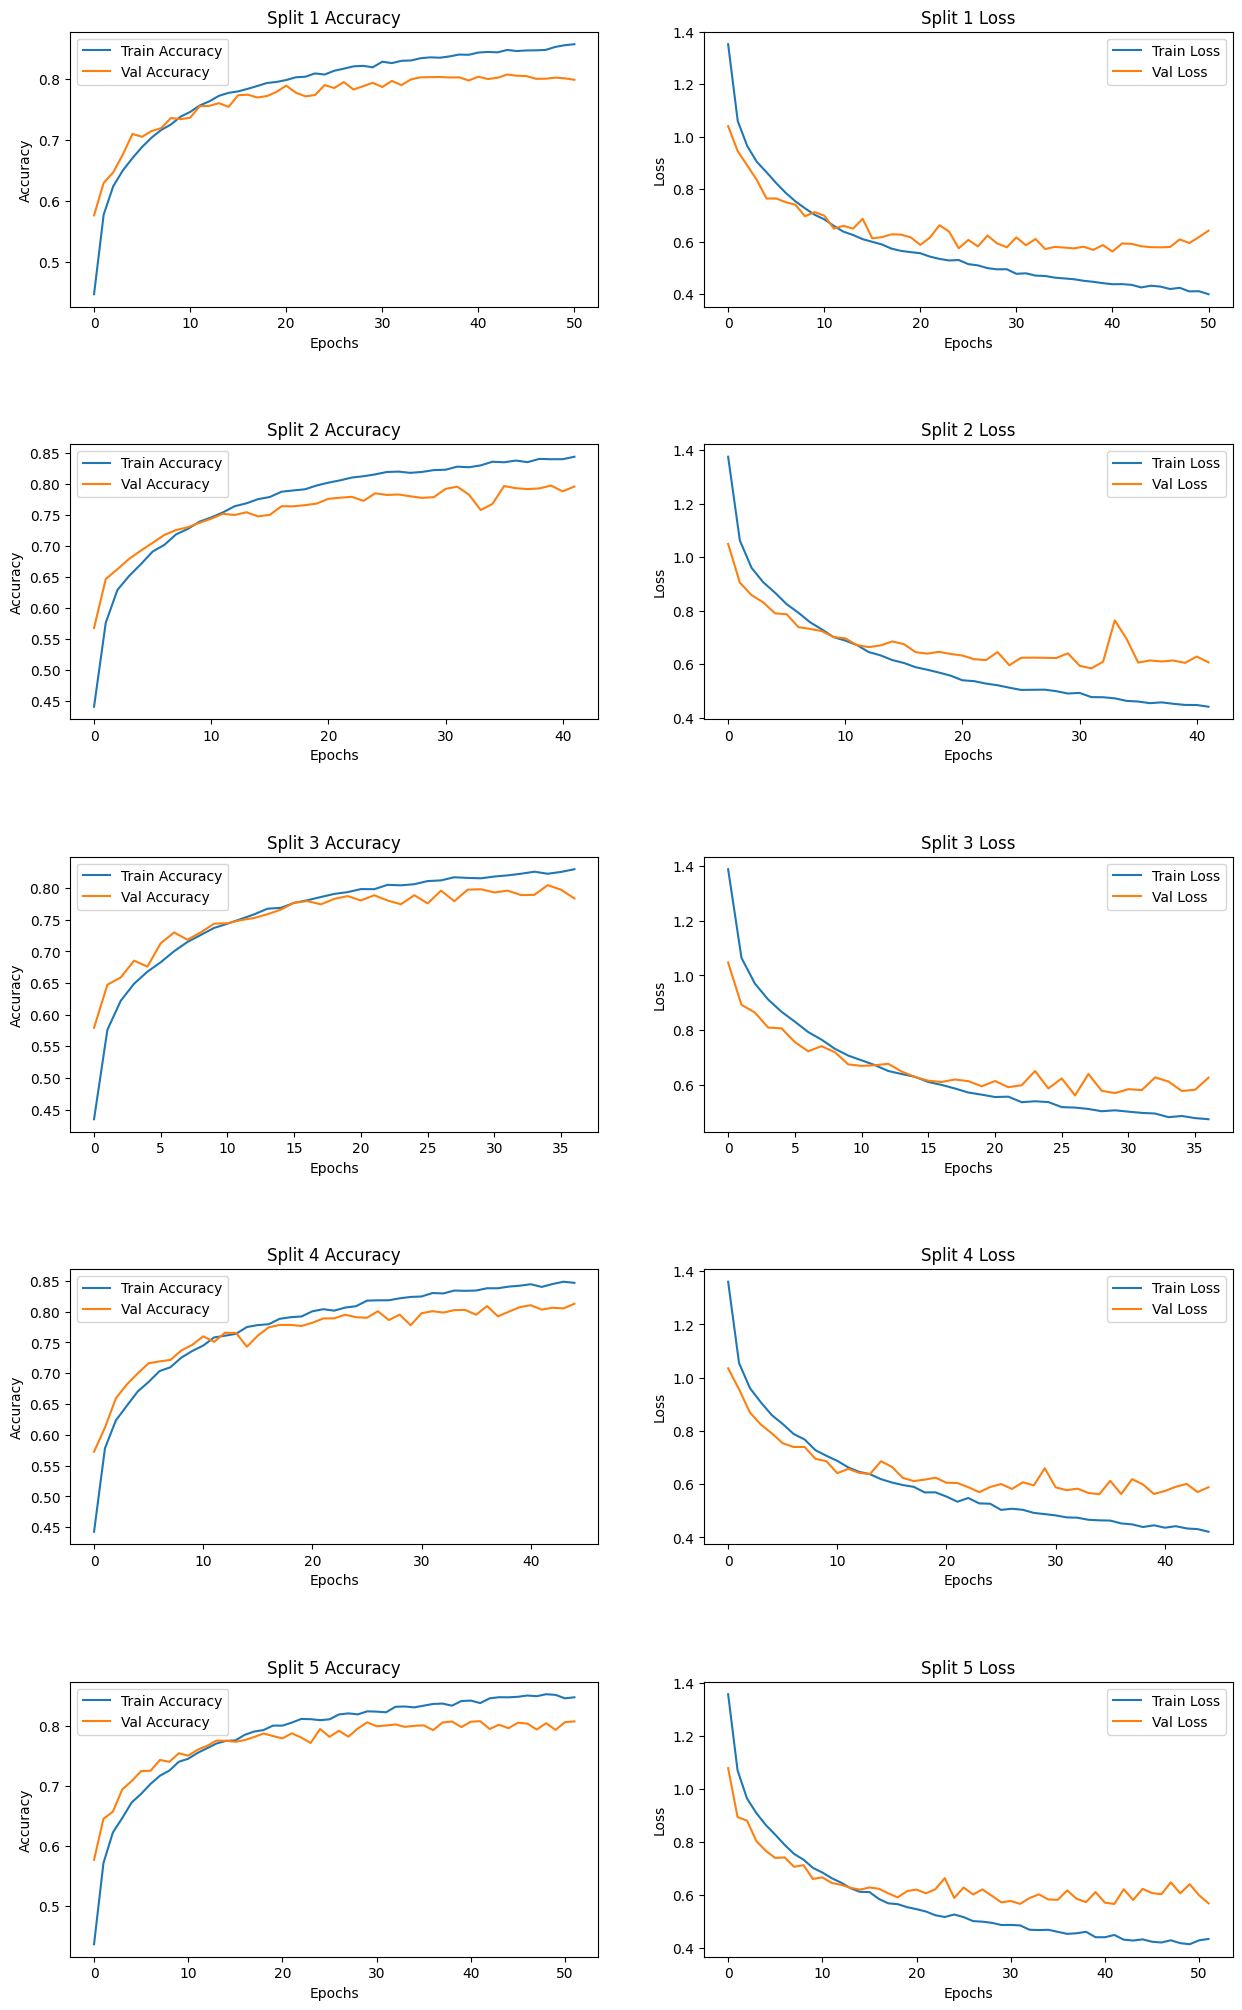

In [35]:
# Vẽ biểu đồ learning curves
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)

for i, history in enumerate(histories):
    # Accuracy plot
    axes[i, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[i, 0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[i, 0].set_title(f'Split {i+1} Accuracy')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Accuracy')
    axes[i, 0].legend()

    # Loss plot
    axes[i, 1].plot(history.history['loss'], label='Train Loss')
    axes[i, 1].plot(history.history['val_loss'], label='Val Loss')
    axes[i, 1].set_title(f'Split {i+1} Loss')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Loss')
    axes[i, 1].legend()

plt.show()

### Bước: Model Evaluation

In [37]:
# Đường dẫn tới các file model
model_files = [
    '/content/drive/MyDrive/Colab/model/model_split_1.h5',
    '/content/drive/MyDrive/Colab/model/model_split_2.h5',
    '/content/drive/MyDrive/Colab/model/model_split_3.h5',
    '/content/drive/MyDrive/Colab/model/model_split_4.h5',
    '/content/drive/MyDrive/Colab/model/model_split_5.h5'
]

# Load các mô hình vào một danh sách
models = [load_model(file) for file in model_files]

In [38]:
# Đường dẫn tới các file test
test_feature_paths = [
    '/content/drive/MyDrive/Colab/feature-label/features_test_1.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_test_2.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_test_3.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_test_4.npy',
    '/content/drive/MyDrive/Colab/feature-label/features_test_5.npy'
    # Thêm các đường dẫn khác tại đây
]

test_label_paths = [
    '/content/drive/MyDrive/Colab/feature-label/labels_test_1.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_test_2.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_test_3.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_test_4.npy',
    '/content/drive/MyDrive/Colab/feature-label/labels_test_5.npy'
    # Thêm các đường dẫn khác tại đây
]

In [39]:
# Đánh giá từng mô hình trên tập test tương ứng
for i, model in enumerate(models):
    # Load dữ liệu test
    X_test = np.load(test_feature_paths[i])
    y_test = np.load(test_label_paths[i])

    # Dự đoán trên tập test
    y_test_pred_proba = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_proba, axis=1)

    # Đánh giá mô hình trên tập test
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
    print(f'Test Accuracy of split {i+1}: {test_accuracy:.4f}')

217/217 [==============================] - 8s 34ms/step
Test Accuracy of split 1: 0.7084
217/217 [==============================] - 6s 28ms/step
Test Accuracy of split 2: 0.7142
193/193 [==============================] - 6s 30ms/step
Test Accuracy of split 3: 0.7214
218/218 [==============================] - 8s 34ms/step
Test Accuracy of split 4: 0.7125
218/218 [==============================] - 6s 26ms/step
Test Accuracy of split 5: 0.7166


218/218 [==============================] - 5s 22ms/step


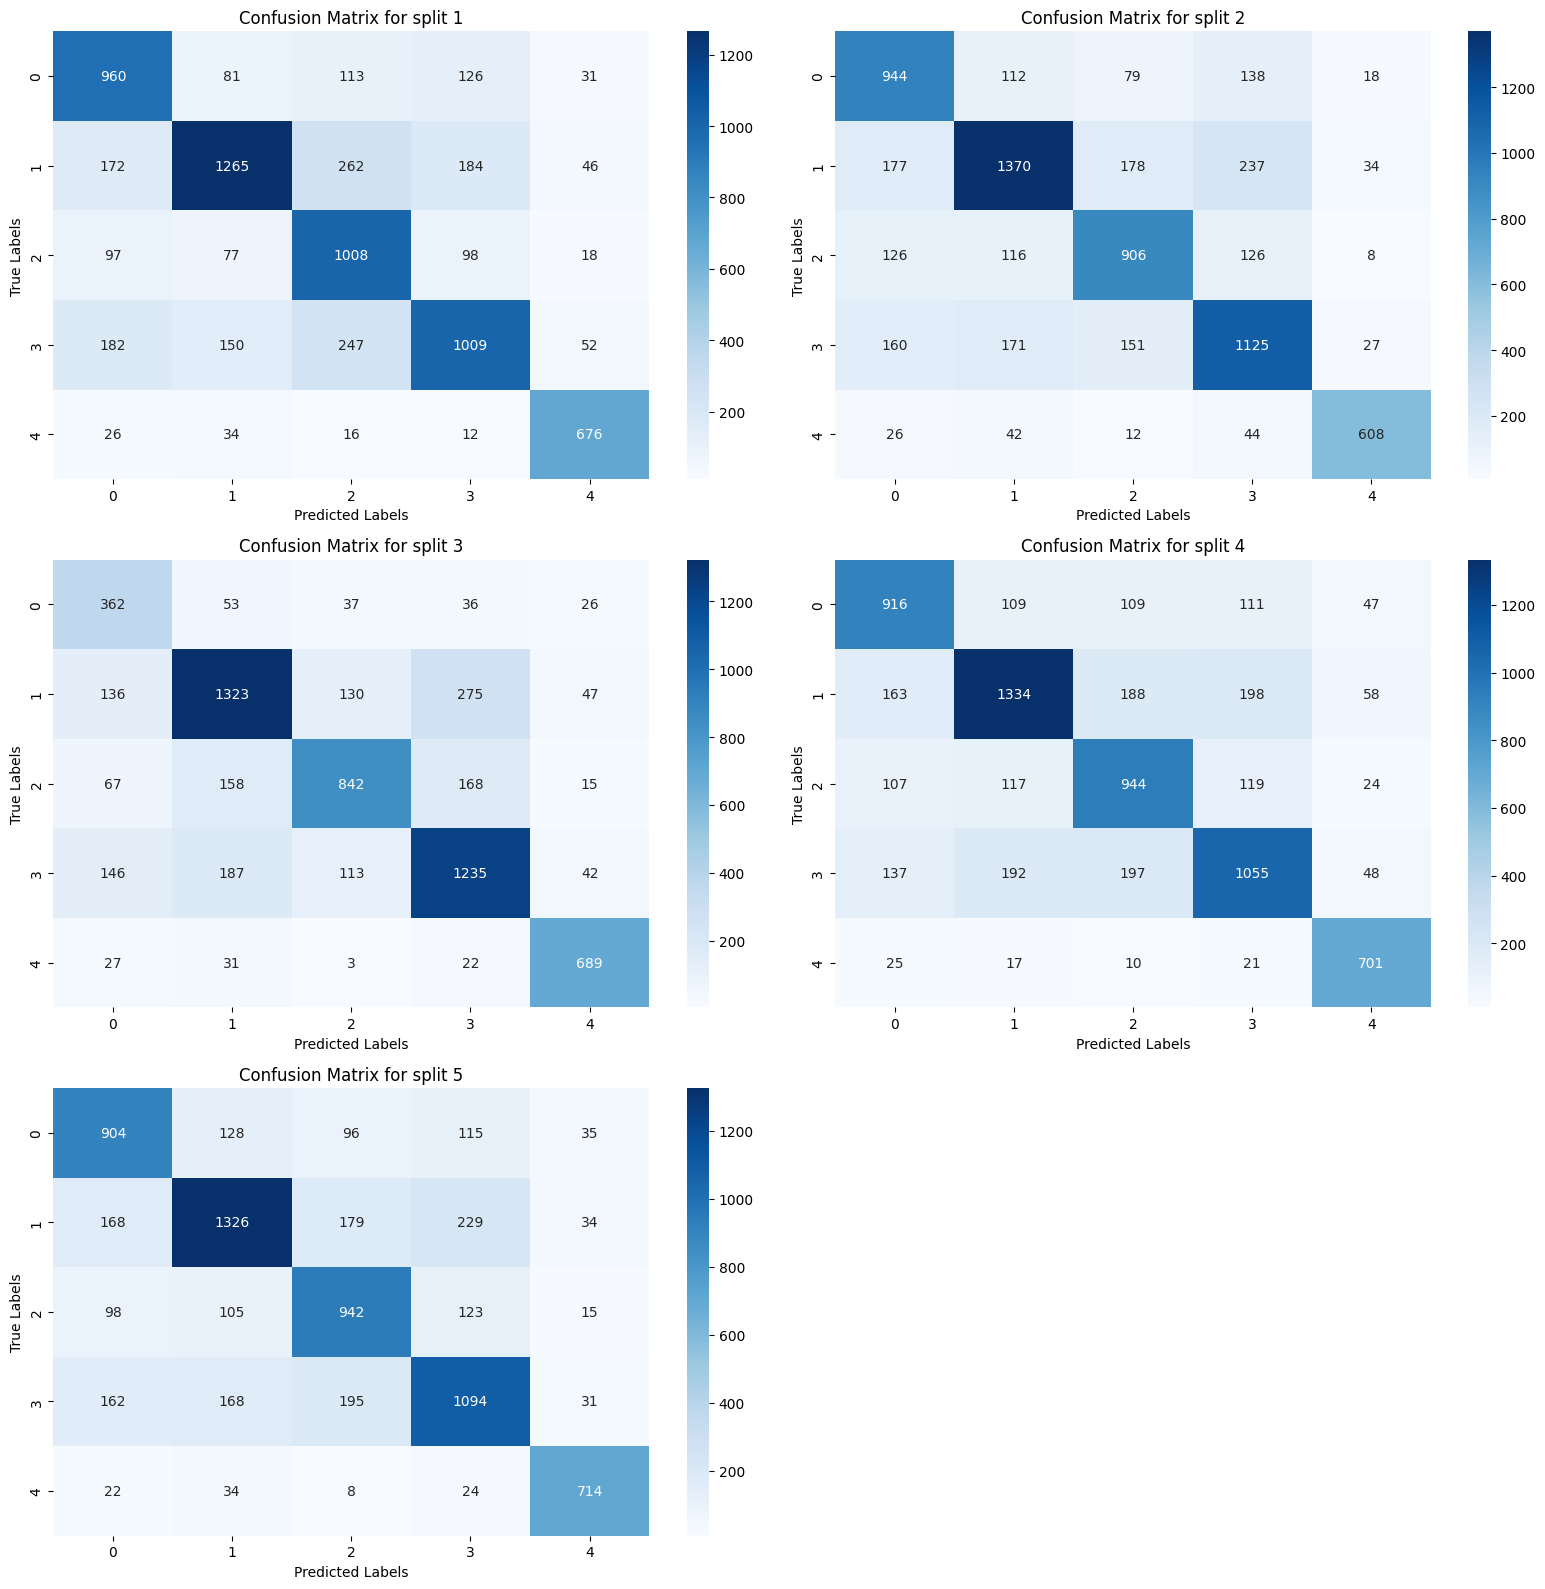

In [41]:
plt.figure(figsize=(16, 16))  # Tăng chiều cao của figure để chứa đủ các confusion matrix
for i, model in enumerate(models):
    # Load dữ liệu test
    X_test = np.load(test_feature_paths[i])
    y_test = np.load(test_label_paths[i])

    # Dự đoán trên tập test
    y_test_pred_proba = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred_proba, axis=1)

    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

    # Vẽ heatmap của ma trận nhầm lẫn
    plt.subplot((len(test_feature_paths) + 1) // 2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for split {i+1}')

plt.tight_layout()
plt.show()

### Bước: Submission

- Ghi kết quả ra tập tin CS114.O21-O21.KHCL.ScoreBoard.csv theo chế độ Append: https://drive.google.com/file/d/1qjGycdcIqsoag_yaVqY8UAUNmpFUkVFe/view?usp=sharing
- Quy ước:
  - Date: ví dụ 2024-06-11 10:32:19 (dùng hàm formatted_date = now.strftime("%Y-%m-%d %H:%M:%S"))
  - GroupID: các MSSV của thành viên trong nhóm cách nhau bằng dấu gạch ngang -, ví dụ 21522446-21522243
  - SplitID: giá trị từ 1 đến 5
  - Accuracy: giá trị theo quy ước dấu . phân cách phần thập phân, ví dụ 90.2345 - lấy đến 4 số thập phân
  - Desc: mô tả phương pháp, ví dụ Random. Mỗi nhóm có thể có rất nhiều trials, do đó cần phải mô tả tóm tắt về các trial để còn nhận diện
  


In [ ]:
# Định dạng ngày giờ hiện tại
now = datetime.now()

# Tạo DataFrame từ kết quả
submission_data = {
    "Date": [now.strftime("%Y-%m-%d %H:%M:%S")],
    "GroupID": ["21522608-21521809"],
    "SplitID": ["Split 1"],
    "Accuracy": ["0.7084"],
    "Desc": ["ResNet50 + FCNN"]
}

submission_df = pd.DataFrame(submission_data)

# Ghi kết quả ra tập tin CSV
submission_file_path = "/content/drive/MyDrive/Public/CS114.O21-O21.KHCL.ScoreBoard.csv"
try:
    existing_df = pd.read_csv(submission_file_path)
    submission_df = pd.concat([existing_df, submission_df], ignore_index=True)
except FileNotFoundError:
    pass

submission_df.to_csv(submission_file_path, index=False)

print("Submission saved to", submission_file_path)
# print(submission_df)
print(submission_df.T.to_string(header=False))

Submission saved to /content/drive/MyDrive/Public/CS114.O21-O21.KHCL.ScoreBoard.csv
Date      2024-06-11 10:32:19  2024-06-11 17:37:50  2024-06-13 19:05:54  2024-06-13 19:08:31  2024-06-14 14:31:26  2024-06-14 14:32:11  2024-06-19 12:52:14  2024-06-27 12:57:23  2024-06-27 14:05:04  2024-06-27 14:18:16  2024-06-27 14:23:48  2024-06-27 14:24:26  2024-06-27 21:34:00  2024-06-28 2:25:00  2024-06-28 3:30:00  2024-06-28 9:28:00  2024-06-28 9:27:00  2024-06-28 13:16:00  2024-06-28 10:09:42  2024-06-28 17:09:22  2024-06-28 17:13:53  2024-06-29 03:44:42  2024-06-29 11:47:00  2024-06-29 11:47:00  2024-06-29 11:47:00  2024-06-29 11:47:00  2024-06-29 11:47:00  2024-06-29 06:10:01  2024-06-29 08:46:09  2024-06-29 10:28:33  2024-06-29 10:35:20  2024-06-29 10:35:56  2024-06-29 10:36:13  2024-06-29 10:36:35  2024-06-30 02:42:32  2024-06-30 04:52:24  2024-06-30 12:45:37  2024-06-30 14:48:59  2024-06-30 08:04:47  2024-06-30 13:42:28  2024-06-30 16:51:08  2024-06-30 16:53:19  2024-06-30 17:16:15  2024-06